In [1]:
from google.colab import drive
drive.mount('/content/gdrive' )

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#importing libraries
import pandas as pd
import h5py
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

In [0]:
#loadin dataset
file = h5py.File('gdrive/My Drive/Colab Notebooks/assignment/SVHN_single_grey1-2.h5', 'r')

Data fetching and understand the train/val/test splits.


In [326]:
# List all groups
print("Keys: %s" % file.keys())
a_group_key = list(file.keys())
print(a_group_key)

Keys: <KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>
['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [0]:
#splitting training,validation and test from original dataset
X_train = np.array(file['X_train'])
y_train = np.array(file['y_train'])
X_val = np.array(file['X_val'])
y_val = np.array(file['y_val'])
X_test = np.array(file['X_test'])
y_test = np.array(file['y_test'])

In [328]:
# data shape is
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(42000, 32, 32)
(60000, 32, 32)
(18000, 32, 32)
(42000,)
(60000,)
(18000,)


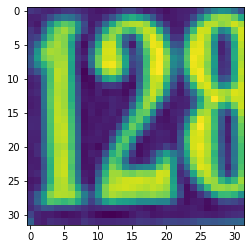

In [329]:
#considering file is clean data proceeding with model building functionalities.
plt.figure()
plt.imshow(X_train[0])
plt.grid(False)
plt.show()

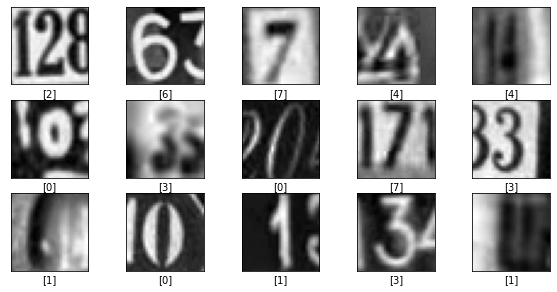

Label for each of the above image is [2 6 7 4 4 0 3 0 7 3 1 0 1 3 1]


In [330]:
#viewing the training data
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel([y_train[i]])
plt.show()
print('Label for each of the above image is',y_train[0:15])

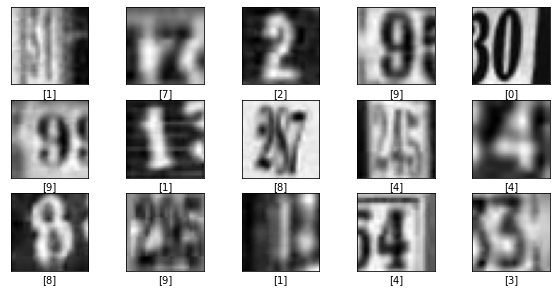

Label for each of the above image is [1 7 2 9 0 9 1 8 4 4 8 9 1 4 3]


In [331]:
# verifying test data
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel([y_test[i]])
plt.show()
print('Label for each of the above image is',y_test[0:15])

In [332]:
y_train , y_test, y_val

(array([2, 6, 7, ..., 7, 0, 4], dtype=uint8),
 array([1, 7, 2, ..., 7, 9, 2], dtype=uint8),
 array([0, 0, 0, ..., 9, 9, 9], dtype=uint8))

In [0]:
y_trainc = tf.keras.utils.to_categorical(y_train,num_classes=10)

In [0]:
y_testc = tf.keras.utils.to_categorical(y_test,num_classes=10)

In [0]:
y_valc = tf.keras.utils.to_categorical(y_val,num_classes=10)

In [336]:
y_trainc

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [337]:
y_testc

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [338]:
y_valc

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [0]:
#scaling the data between 0-1
X_trains = X_train/255.0
X_tests = X_test/255.0
X_vals = X_val/255.0

In [158]:
X_trains

array([[[0.12968785, 0.11866706, 0.10530196, ..., 0.2801847 ,
         0.2283153 , 0.16860352],
        [0.09893451, 0.10020902, 0.1175549 , ..., 0.4432192 ,
         0.40534863, 0.33056822],
        [0.10304902, 0.08868118, 0.15873058, ..., 0.44432473,
         0.47754902, 0.45263842],
        ...,
        [0.11196157, 0.14200786, 0.17678471, ..., 0.09465059,
         0.09840274, 0.10219726],
        [0.15072627, 0.10381687, 0.09126157, ..., 0.11023294,
         0.11556196, 0.11790627],
        [0.19724864, 0.10226392, 0.0942702 , ..., 0.19477727,
         0.19942354, 0.20799099]],

       [[0.34101608, 0.3414451 , 0.34656274, ..., 0.3600055 ,
         0.35195178, 0.3628635 ],
        [0.33995295, 0.340829  , 0.34287727, ..., 0.35580626,
         0.3419765 , 0.34730548],
        [0.33711922, 0.33652744, 0.33695647, ..., 0.25044155,
         0.23458785, 0.21521765],
        ...,
        [0.35381806, 0.35703844, 0.3665243 , ..., 0.21707255,
         0.19051842, 0.17276745],
        [0.3

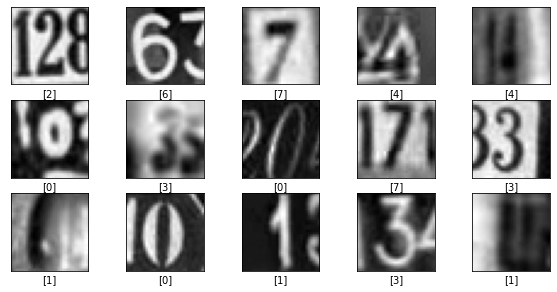

Label for each of the above image is [2 6 7 4 4 0 3 0 7 3 1 0 1 3 1]


In [159]:
#viewing the sample image after scaling
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_trains[i], cmap=plt.cm.binary) 
    plt.xlabel([y_train[i]])
plt.show()
print('Label for each of the above image is',y_train[0:15])

Building feed forward neural network which consist of simple input and hidden layers with weights and bias added to each layer





Building neural network model without hidden and batchnormalization layer. only with output layer

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
model.add(tf.keras.layers.Dense(10,activation = 'softmax'))
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=["accuracy"])

In [0]:
output = model.fit(X_trains,y_trainc,validation_data=(X_vals, y_valc),epochs=20)

Epoch 1/20
1313/1313 [==============================] - 4s 3ms/step - loss: 2.3211 - accuracy: 0.1082 - val_loss: 2.3442 - val_accuracy: 0.1126
Epoch 2/20
1313/1313 [==============================] - 4s 3ms/step - loss: 2.3037 - accuracy: 0.1264 - val_loss: 2.3014 - val_accuracy: 0.1146
Epoch 3/20
1313/1313 [==============================] - 4s 3ms/step - loss: 2.2950 - accuracy: 0.1426 - val_loss: 2.2926 - val_accuracy: 0.1403
Epoch 4/20
1313/1313 [==============================] - 4s 3ms/step - loss: 2.2903 - accuracy: 0.1480 - val_loss: 2.3021 - val_accuracy: 0.1407
Epoch 5/20
1313/1313 [==============================] - 4s 3ms/step - loss: 2.2860 - accuracy: 0.1565 - val_loss: 2.2757 - val_accuracy: 0.1679
Epoch 6/20
1313/1313 [==============================] - 4s 3ms/step - loss: 2.2813 - accuracy: 0.1649 - val_loss: 2.2753 - val_accuracy: 0.1649
Epoch 7/20
1313/1313 [==============================] - 4s 3ms/step - loss: 2.2791 - accuracy: 0.1657 - val_loss: 2.2835 - val_accuracy:

Train: 0.194, Test: 0.182


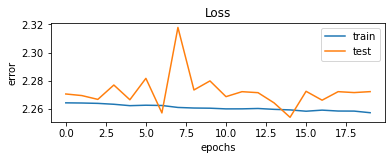

In [0]:
trainloss, trainaccuracy = model.evaluate(X_trains, y_trainc, verbose=0)
testloss,testaccuracy = model.evaluate(X_tests, y_testc, verbose=0)
print('Train: %.3f, Test: %.3f' % (trainaccuracy, testaccuracy))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(output.history['loss'], label='train')
pyplot.plot(output.history['val_loss'], label='test')
pyplot.xlabel('epochs')
pyplot.ylabel('error')

pyplot.legend()

Model performed poorly without hidden layers and activation function

Building neural network with hidden layers with activation function as reLU


In [0]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
model1.add(tf.keras.layers.Dense(100,activation = 'relu'))
model1.add(tf.keras.layers.Dense(1000,activation = 'relu'))
model1.add(tf.keras.layers.Dense(10,activation = 'softmax'))
model1.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=["accuracy"])
output1= model1.fit(X_trains,y_trainc,validation_data=(X_vals, y_valc),epochs=50, batch_size = 100)

Epoch 1/50
420/420 [==============================] - 4s 8ms/step - loss: 2.3000 - accuracy: 0.1174 - val_loss: 2.2930 - val_accuracy: 0.1335
Epoch 2/50
420/420 [==============================] - 3s 8ms/step - loss: 2.2889 - accuracy: 0.1466 - val_loss: 2.2836 - val_accuracy: 0.1496
Epoch 3/50
420/420 [==============================] - 3s 8ms/step - loss: 2.2760 - accuracy: 0.1859 - val_loss: 2.2665 - val_accuracy: 0.1930
Epoch 4/50
420/420 [==============================] - 3s 8ms/step - loss: 2.2552 - accuracy: 0.2268 - val_loss: 2.2406 - val_accuracy: 0.2331
Epoch 5/50
420/420 [==============================] - 3s 8ms/step - loss: 2.2205 - accuracy: 0.2819 - val_loss: 2.1955 - val_accuracy: 0.2803
Epoch 6/50
420/420 [==============================] - 3s 8ms/step - loss: 2.1609 - accuracy: 0.3282 - val_loss: 2.1197 - val_accuracy: 0.3475
Epoch 7/50
420/420 [==============================] - 3s 8ms/step - loss: 2.0704 - accuracy: 0.3663 - val_loss: 2.0145 - val_accuracy: 0.4036
Epoch 

Model performace improved by including 3 hidden layers and increasing the epochs and batch size

Train: 0.773, Test: 0.760


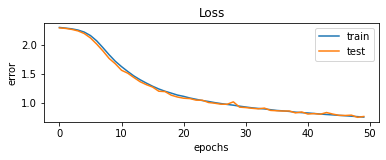

In [0]:
trainloss1, trainaccuracy1 = model1.evaluate(X_trains, y_trainc, verbose=0)
testloss1,testaccuracy1 = model1.evaluate(X_tests, y_testc, verbose=0)
print('Train: %.3f, Test: %.3f' % (trainaccuracy1, testaccuracy1))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(output1.history['loss'], label='train')
pyplot.plot(output1.history['val_loss'], label='test')
pyplot.xlabel('epochs')
pyplot.ylabel('error')

pyplot.legend()

Similar performance is observed in training and test data

Build neural network model with BatchNormalization layer

In [0]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dense(100,activation = 'relu'))
model2.add(tf.keras.layers.Dense(1000,activation = 'relu'))
model2.add(tf.keras.layers.Dense(10,activation = 'softmax'))
model2.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=["accuracy"])
output2 = model2.fit(X_trains,y_trainc,validation_data=(X_vals, y_valc),epochs=50, batch_size = 100)

Epoch 1/50
420/420 [==============================] - 4s 10ms/step - loss: 2.1905 - accuracy: 0.2410 - val_loss: 2.0243 - val_accuracy: 0.3969
Epoch 2/50
420/420 [==============================] - 4s 10ms/step - loss: 1.7225 - accuracy: 0.4953 - val_loss: 1.4538 - val_accuracy: 0.5955
Epoch 3/50
420/420 [==============================] - 4s 10ms/step - loss: 1.3274 - accuracy: 0.6161 - val_loss: 1.1792 - val_accuracy: 0.6605
Epoch 4/50
420/420 [==============================] - 4s 10ms/step - loss: 1.1460 - accuracy: 0.6630 - val_loss: 1.0465 - val_accuracy: 0.6952
Epoch 5/50
420/420 [==============================] - 4s 10ms/step - loss: 1.0377 - accuracy: 0.6914 - val_loss: 0.9615 - val_accuracy: 0.7193
Epoch 6/50
420/420 [==============================] - 4s 10ms/step - loss: 0.9662 - accuracy: 0.7126 - val_loss: 0.8985 - val_accuracy: 0.7363
Epoch 7/50
420/420 [==============================] - 4s 10ms/step - loss: 0.9105 - accuracy: 0.7284 - val_loss: 0.8542 - val_accuracy: 0.7511

Train: 0.907, Test: 0.851


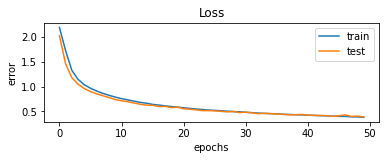

In [0]:
trainloss2, trainaccuracy2 = model2.evaluate(X_trains, y_trainc, verbose=0)
testloss2,testaccuracy2 = model2.evaluate(X_tests, y_testc, verbose=0)
print('Train: %.3f, Test: %.3f' % (trainaccuracy2, testaccuracy2))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(output2.history['loss'], label='train')
pyplot.plot(output2.history['val_loss'], label='test')
pyplot.xlabel('epochs')
pyplot.ylabel('error')

pyplot.legend()


Model performace improved drastically after including batch normalization layer. The accuracy increased from 76% to 85 %. The loss is similar in training and test data

Using adam optimizer to check the model performance

In [0]:
#using adam optimizer
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
model3.add(tf.keras.layers.BatchNormalization())
model3.add(tf.keras.layers.Dense(100,activation = 'relu'))
model3.add(tf.keras.layers.Dense(1000,activation = 'relu'))
model3.add(tf.keras.layers.Dense(10,activation = 'softmax'))
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy"])
output3 = model3.fit(X_trains,y_trainc,validation_data=(X_vals, y_valc),epochs=50, batch_size = 100)

Epoch 1/50
420/420 [==============================] - 5s 11ms/step - loss: 1.2154 - accuracy: 0.6059 - val_loss: 0.8366 - val_accuracy: 0.7462
Epoch 2/50
420/420 [==============================] - 4s 11ms/step - loss: 0.7886 - accuracy: 0.7574 - val_loss: 0.6843 - val_accuracy: 0.7901
Epoch 3/50
420/420 [==============================] - 5s 11ms/step - loss: 0.6710 - accuracy: 0.7934 - val_loss: 0.5711 - val_accuracy: 0.8301
Epoch 4/50
420/420 [==============================] - 5s 11ms/step - loss: 0.6015 - accuracy: 0.8145 - val_loss: 0.5509 - val_accuracy: 0.8324
Epoch 5/50
420/420 [==============================] - 5s 11ms/step - loss: 0.5511 - accuracy: 0.8290 - val_loss: 0.5072 - val_accuracy: 0.8460
Epoch 6/50
420/420 [==============================] - 5s 11ms/step - loss: 0.5079 - accuracy: 0.8422 - val_loss: 0.5188 - val_accuracy: 0.8401
Epoch 7/50
420/420 [==============================] - 4s 11ms/step - loss: 0.4685 - accuracy: 0.8502 - val_loss: 0.4311 - val_accuracy: 0.8715

Train: 0.985, Test: 0.846


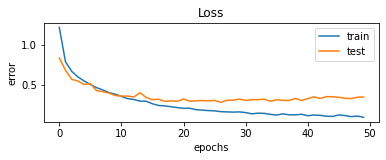

In [0]:
trainloss3, trainaccuracy3 = model3.evaluate(X_trains, y_trainc, verbose=0)
testloss3,testaccuracy3 = model3.evaluate(X_tests, y_testc, verbose=0)
print('Train: %.3f, Test: %.3f' % (trainaccuracy3, testaccuracy3))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(output3.history['loss'], label='train')
pyplot.plot(output3.history['val_loss'], label='test')
pyplot.xlabel('epochs')
pyplot.ylabel('error')

pyplot.legend()

When adam optimizer is used accuracy dropped from 85 to 84%.

In [0]:
#using batchnormalization layer and dropout layer
model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
model4.add(tf.keras.layers.BatchNormalization())
model4.add(tf.keras.layers.Dense(100,activation = 'relu'))
model4.add(tf.keras.layers.Dropout(0.2))
model4.add(tf.keras.layers.Dense(1000,activation = 'relu'))
model4.add(tf.keras.layers.Dropout(0.2))
model4.add(tf.keras.layers.Dense(10,activation = 'softmax'))
model4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy"])
output4 = model4.fit(X_trains,y_trainc,validation_data=(X_vals, y_valc),epochs=70, batch_size = 150)

Epoch 1/70
280/280 [==============================] - 4s 14ms/step - loss: 1.4401 - accuracy: 0.5198 - val_loss: 1.0781 - val_accuracy: 0.7121
Epoch 2/70
280/280 [==============================] - 4s 14ms/step - loss: 1.0030 - accuracy: 0.6873 - val_loss: 0.7788 - val_accuracy: 0.7708
Epoch 3/70
280/280 [==============================] - 4s 14ms/step - loss: 0.8726 - accuracy: 0.7315 - val_loss: 0.6891 - val_accuracy: 0.7948
Epoch 4/70
280/280 [==============================] - 4s 14ms/step - loss: 0.8100 - accuracy: 0.7509 - val_loss: 0.6397 - val_accuracy: 0.8091
Epoch 5/70
280/280 [==============================] - 4s 14ms/step - loss: 0.7609 - accuracy: 0.7657 - val_loss: 0.5802 - val_accuracy: 0.8329
Epoch 6/70
280/280 [==============================] - 4s 14ms/step - loss: 0.7176 - accuracy: 0.7771 - val_loss: 0.5420 - val_accuracy: 0.8421
Epoch 7/70
280/280 [==============================] - 4s 15ms/step - loss: 0.6922 - accuracy: 0.7869 - val_loss: 0.5350 - val_accuracy: 0.8427

Train: 0.962, Test: 0.864


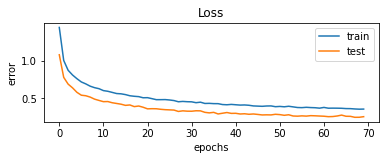

In [0]:
trainloss4, trainaccuracy4 = model4.evaluate(X_trains, y_trainc, verbose=0)
testloss4,testaccuracy4 = model4.evaluate(X_tests, y_testc, verbose=0)
print('Train: %.3f, Test: %.3f' % (trainaccuracy4, testaccuracy4))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(output4.history['loss'], label='train')
pyplot.plot(output4.history['val_loss'], label='test')
pyplot.xlabel('epochs')
pyplot.ylabel('error')

pyplot.legend()

[0.712066650390625, 0.7708333134651184, 0.7947666645050049, 0.8090500235557556, 0.8328666687011719, 0.84211665391922, 0.8427333235740662, 0.8493333458900452, 0.8582166433334351, 0.8611833453178406, 0.8671500086784363, 0.8684166669845581, 0.8718000054359436, 0.8734166622161865, 0.8744333386421204, 0.8836833238601685, 0.8795333504676819, 0.8868499994277954, 0.8858500123023987, 0.8911166787147522, 0.897516667842865, 0.8967000246047974, 0.8971499800682068, 0.8981166481971741, 0.8990499973297119, 0.9012166857719421, 0.9038000106811523, 0.9064666628837585, 0.9058833122253418, 0.9061499834060669, 0.9064000248908997, 0.9068666696548462, 0.9056000113487244, 0.9127333164215088, 0.9142833352088928, 0.9119666814804077, 0.9190999865531921, 0.9182666540145874, 0.9125499725341797, 0.9192666411399841, 0.91798335313797, 0.9199833273887634, 0.9180999994277954, 0.9236666560173035, 0.9195666909217834, 0.9228666424751282, 0.9243999719619751, 0.9244499802589417, 0.9246000051498413, 0.9214166402816772, 0.922

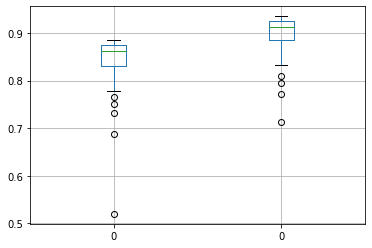

In [0]:
print(output4.history['val_accuracy'])

print(output4.history['accuracy'])

ta = pd.DataFrame(output4.history['accuracy'])
va = pd.DataFrame(output4.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

With Batchnormalization layer and dropout layer model seems to be overfitting, test loss is lesser than the training loss and test accuracy is higher than the training accuracy

In [0]:
#using adam optimizer with dropout layer
model6 = tf.keras.Sequential()
model6.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
model6.add(tf.keras.layers.Dense(100,activation = 'relu'))
model6.add(tf.keras.layers.Dropout(0.2))
model6.add(tf.keras.layers.Dense(1000,activation = 'relu'))
model6.add(tf.keras.layers.Dropout(0.2))
model6.add(tf.keras.layers.Dense(10,activation = 'softmax'))
model6.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy"])
output6 = model6.fit(X_trains,y_trainc,validation_data=(X_vals, y_valc),epochs=70, batch_size = 150)

Epoch 1/70
280/280 [==============================] - 4s 13ms/step - loss: 2.2310 - accuracy: 0.1438 - val_loss: 2.0659 - val_accuracy: 0.2265
Epoch 2/70
280/280 [==============================] - 4s 13ms/step - loss: 2.1076 - accuracy: 0.1965 - val_loss: 2.0307 - val_accuracy: 0.2386
Epoch 3/70
280/280 [==============================] - 4s 13ms/step - loss: 2.0820 - accuracy: 0.2035 - val_loss: 2.0003 - val_accuracy: 0.2551
Epoch 4/70
280/280 [==============================] - 4s 13ms/step - loss: 2.0654 - accuracy: 0.2119 - val_loss: 1.9644 - val_accuracy: 0.2700
Epoch 5/70
280/280 [==============================] - 4s 13ms/step - loss: 2.0492 - accuracy: 0.2151 - val_loss: 1.9843 - val_accuracy: 0.2556
Epoch 6/70
280/280 [==============================] - 4s 13ms/step - loss: 2.0396 - accuracy: 0.2203 - val_loss: 1.9246 - val_accuracy: 0.2947
Epoch 7/70
280/280 [==============================] - 4s 13ms/step - loss: 2.0286 - accuracy: 0.2323 - val_loss: 1.9144 - val_accuracy: 0.3057

In [0]:
trainloss6, trainaccuracy6 = model6.evaluate(X_trains, y_trainc, verbose=0)
testloss6,testaccuracy6 = model6.evaluate(X_tests, y_testc, verbose=0)
print('Train: %.3f, Test: %.3f' % (trainaccuracy6, testaccuracy6))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(output6.history['loss'], label='train')
pyplot.plot(output6.history['val_loss'], label='test')
pyplot.xlabel('epochs')
pyplot.ylabel('error')

pyplot.legend()

NameError: ignored

Model performed poorly without batch normalization layer and with Droput layer. The accuracy dropped from 85 to 51 and we could observe lot of distortion.

In [0]:
#using RandomizedCV to predict best optimizer and best epoch and batch size

In [0]:
def create_model():
  model5 = tf.keras.Sequential()
  model5.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
  model5.add(tf.keras.layers.BatchNormalization())
  model5.add(tf.keras.layers.Dense(100,activation = 'relu'))
  model5.add(tf.keras.layers.Dense(1000,activation = 'relu'))
  model5.add(tf.keras.layers.Dense(10,activation = 'softmax'))
  model5.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy"])
  return model5


In [0]:
modelgrid = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn = create_model,verbose=0)

In [0]:


batch_size = [25,30,35,40,50,100,150,180,200]
epochs = [30,50,60,80,100,150,200]
param_grid = dict(epochs = epochs,batch_size = batch_size)
grid = RandomizedSearchCV(estimator=modelgrid, param_distributions=param_grid, n_jobs=-1)
grid_result = grid.fit(X_trains, y_trainc)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [0]:
print(grid_result.best_params_)
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
print('mean of accuracy is', means)
print('stds is', stds)

{'optimizer': 'SGD', 'epochs': 120, 'batch_size': 25}
mean of accuracy is [0.83766667 0.84071429 0.84242858 0.83769047 0.83811904 0.83938094
 0.83888096 0.84023809 0.84061905 0.84230952]
stds is [0.0041092  0.00379237 0.00511134 0.00602697 0.00429458 0.00222003
 0.0027547  0.00105411 0.00536186 0.00291081]


In [0]:

def create_model1(optimizer='adam'):
  model7 = tf.keras.Sequential()
  model7.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
  model7.add(tf.keras.layers.BatchNormalization())
  model7.add(tf.keras.layers.Dense(100,activation = 'relu'))
  model7.add(tf.keras.layers.Dense(1000,activation = 'relu'))
  model7.add(tf.keras.layers.Dense(10,activation = 'softmax'))
  model7.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy"])
  return model7


modelgrid1 = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn = create_model1,verbose=0)

optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid1 = dict(optimizer=optimizer,batch_size=[25,30,50,100],epochs=[60,80,100,120])
grid = RandomizedSearchCV(estimator=modelgrid1, param_distributions=param_grid1, n_jobs=-1,cv=5)
grid_result = grid.fit(X_trains, y_trainc)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [0]:
print(grid_result.best_params_)
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
print('mean of accuracy is', means)
print('stds is', stds)

{'optimizer': 'SGD', 'epochs': 120, 'batch_size': 25}
mean of accuracy is [0.83766667 0.84071429 0.84242858 0.83769047 0.83811904 0.83938094
 0.83888096 0.84023809 0.84061905 0.84230952]
stds is [0.0041092  0.00379237 0.00511134 0.00602697 0.00429458 0.00222003
 0.0027547  0.00105411 0.00536186 0.00291081]


Building model with best paramters obtained from RandomizedSearchcv, SGD optimizer and batchsize as 25 and epoch as 120

In [0]:
model8 = keras.Sequential()
model8.add(keras.layers.Reshape((1024,),input_shape=(32,32,)))
model8.add(keras.layers.BatchNormalization())
model8.add(keras.layers.Dense(100,activation = 'relu'))
model8.add(keras.layers.Dense(1000,activation = 'relu'))
model8.add(keras.layers.Dense(500,activation = 'relu'))
model8.add(keras.layers.Dense(10,activation = 'softmax'))
model8.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=["accuracy"])


In [0]:
output8 = model8.fit(X_trains,y_trainc,validation_data=(X_vals, y_valc),epochs=120, batch_size = 25)
#output6 = model6.fit(X_trains,y_trainc,validation_data=(X_vals, y_valc),epochs=70, batch_size = 150)

Train on 42000 samples, validate on 60000 samples
Epoch 1/120
42000/42000 [==============================] - 19s 452us/step - loss: 1.7217 - accuracy: 0.4234 - val_loss: 1.1188 - val_accuracy: 0.6642
Epoch 2/120
42000/42000 [==============================] - 19s 445us/step - loss: 1.1094 - accuracy: 0.6489 - val_loss: 0.8757 - val_accuracy: 0.7343
Epoch 3/120
42000/42000 [==============================] - 19s 459us/step - loss: 0.9437 - accuracy: 0.7009 - val_loss: 0.7542 - val_accuracy: 0.7762
Epoch 4/120
42000/42000 [==============================] - 19s 450us/step - loss: 0.8391 - accuracy: 0.7361 - val_loss: 0.6577 - val_accuracy: 0.8069
Epoch 5/120
42000/42000 [==============================] - 19s 443us/step - loss: 0.7791 - accuracy: 0.7563 - val_loss: 0.6407 - val_accuracy: 0.8074
Epoch 6/120
42000/42000 [==============================] - 19s 442us/step - loss: 0.7354 - accuracy: 0.7715 - val_loss: 0.5917 - val_accuracy: 0.8247
Epoch 7/120
42000/42000 [=========================

Train: 0.996, Test: 0.864


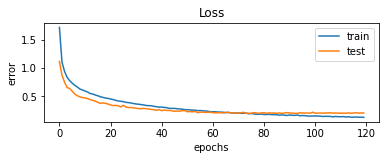

In [0]:
trainloss8, trainaccuracy8 = model8.evaluate(X_trains, y_trainc, verbose=0)
testloss8,testaccuracy8 = model8.evaluate(X_tests, y_testc, verbose=0)
print('Train: %.3f, Test: %.3f' % (trainaccuracy8, testaccuracy8))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(output8.history['loss'], label='train')
pyplot.plot(output8.history['val_loss'], label='test')
pyplot.xlabel('epochs')
pyplot.ylabel('error')

pyplot.legend()

[0.6641666889190674, 0.7342666387557983, 0.7761666774749756, 0.8068666458129883, 0.807366669178009, 0.8246999979019165, 0.8436999917030334, 0.852483332157135, 0.8561833500862122, 0.8596000075340271, 0.8607500195503235, 0.863349974155426, 0.8703666925430298, 0.8724333047866821, 0.8777166604995728, 0.8859999775886536, 0.8909833431243896, 0.8877833485603333, 0.8911666870117188, 0.8946666717529297, 0.8992000222206116, 0.9034500122070312, 0.9022499918937683, 0.9050666689872742, 0.9109500050544739, 0.8986833095550537, 0.9109166860580444, 0.9162999987602234, 0.9139833450317383, 0.916266679763794, 0.9185666441917419, 0.9221500158309937, 0.9210166931152344, 0.9187333583831787, 0.9225166440010071, 0.9244833588600159, 0.9273999929428101, 0.9269333481788635, 0.9312333464622498, 0.9262666702270508, 0.9344666600227356, 0.9297833442687988, 0.9315000176429749, 0.9317833185195923, 0.9324666857719421, 0.9381833076477051, 0.9355999827384949, 0.9376000165939331, 0.9331666827201843, 0.9344666600227356, 0.9

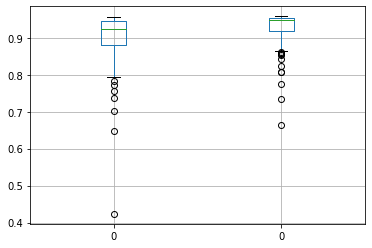

In [0]:
print(output8.history['val_accuracy'])

print(output8.history['accuracy'])

ta = pd.DataFrame(output8.history['accuracy'])
va = pd.DataFrame(output8.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

model performed more or less equally with training and test data.

In [0]:
#adding batch normalization after each layer
model9 = keras.Sequential()
model9.add(keras.layers.Reshape((1024,),input_shape=(32,32,)))
model9.add(keras.layers.BatchNormalization())

model9.add(keras.layers.Dense(500))
model9.add(keras.layers.BatchNormalization())
model9.add(keras.layers.Activation('relu'))

model9.add(keras.layers.Dense(750))
model9.add(keras.layers.BatchNormalization())
model9.add(keras.layers.Activation('relu'))

model9.add(keras.layers.Dense(500))
model9.add(keras.layers.BatchNormalization())
model9.add(keras.layers.Activation('relu'))

model9.add(keras.layers.Dense(10,activation = 'softmax'))
#model9.compile(optimizer='sgd',lr =0.001, loss='categorical_crossentropy',metrics=["accuracy"])
model9.compile(keras.optimizers.SGD(learning_rate=0.02, momentum=0.0, nesterov=False),loss='categorical_crossentropy',metrics=["accuracy"])

In [0]:
output9 = model9.fit(X_trains,y_trainc,validation_data=(X_vals, y_valc),epochs=80, batch_size = 30)


Train on 42000 samples, validate on 60000 samples
Epoch 1/80
42000/42000 [==============================] - 29s 699us/step - loss: 1.3022 - accuracy: 0.5731 - val_loss: 0.8718 - val_accuracy: 0.7295
Epoch 2/80
42000/42000 [==============================] - 32s 753us/step - loss: 0.8967 - accuracy: 0.7136 - val_loss: 0.6758 - val_accuracy: 0.7915
Epoch 3/80
42000/42000 [==============================] - 28s 666us/step - loss: 0.7538 - accuracy: 0.7581 - val_loss: 0.5907 - val_accuracy: 0.8212
Epoch 4/80
42000/42000 [==============================] - 28s 668us/step - loss: 0.6842 - accuracy: 0.7809 - val_loss: 0.5161 - val_accuracy: 0.8448
Epoch 5/80
42000/42000 [==============================] - 28s 671us/step - loss: 0.6266 - accuracy: 0.8017 - val_loss: 0.4831 - val_accuracy: 0.8537
Epoch 6/80
42000/42000 [==============================] - 28s 668us/step - loss: 0.5923 - accuracy: 0.8109 - val_loss: 0.4505 - val_accuracy: 0.8672
Epoch 7/80
42000/42000 [==============================] 

Train: 0.997, Test: 0.865


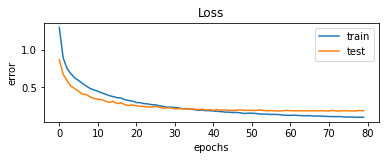

In [0]:
trainloss9, trainaccuracy9 = model9.evaluate(X_trains, y_trainc, verbose=0)
testloss9,testaccuracy9 = model9.evaluate(X_tests, y_testc, verbose=0)
print('Train: %.3f, Test: %.3f' % (trainaccuracy9, testaccuracy9))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(output9.history['loss'], label='train')
pyplot.plot(output9.history['val_loss'], label='test')
pyplot.xlabel('epochs')
pyplot.ylabel('error')

pyplot.legend()

[0.7294666767120361, 0.7914999723434448, 0.8212000131607056, 0.8447666764259338, 0.8537166714668274, 0.8671666383743286, 0.8778666853904724, 0.8795166611671448, 0.8896666765213013, 0.8983500003814697, 0.8986833095550537, 0.901449978351593, 0.9092833399772644, 0.9142666459083557, 0.9096500277519226, 0.9202333092689514, 0.9158833622932434, 0.9247999787330627, 0.930400013923645, 0.92576664686203, 0.9281666874885559, 0.9320999979972839, 0.9333000183105469, 0.9342333078384399, 0.9350833296775818, 0.9308000206947327, 0.9368666410446167, 0.9397666454315186, 0.9394166469573975, 0.9386833310127258, 0.9452499747276306, 0.9436166882514954, 0.9436166882514954, 0.9448833465576172, 0.944100022315979, 0.9463499784469604, 0.9488499760627747, 0.9445666670799255, 0.9499666690826416, 0.947950005531311, 0.9511666893959045, 0.9484833478927612, 0.9513499736785889, 0.9501166939735413, 0.9516500234603882, 0.9529500007629395, 0.9509999752044678, 0.9498500227928162, 0.9519000053405762, 0.951616644859314, 0.9527

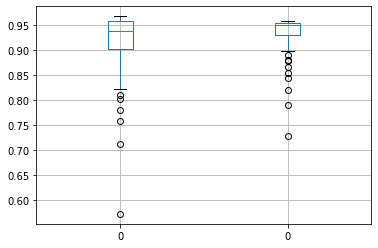

In [0]:
print(output9.history['val_accuracy'])

print(output9.history['accuracy'])

ta = pd.DataFrame(output9.history['accuracy'])
va = pd.DataFrame(output9.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

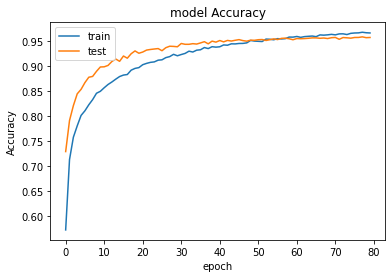

In [0]:
plt.plot(output9.history['accuracy'])
plt.plot(output9.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [0]:
model9.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_1 (Dense)              (None, 500)               512500    
_________________________________________________________________
batch_normalization_2 (Batch (None, 500)               2000      
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 750)               375750    
_________________________________________________________________
batch_normalization_3 (Batch (None, 750)              

In [0]:
#using earlystopping to observe model performace
from tensorflow.keras.callbacks import EarlyStopping

model10 = keras.Sequential()
model10.add(keras.layers.Reshape((1024,),input_shape=(32,32,)))
model10.add(keras.layers.BatchNormalization())

model10.add(keras.layers.Dense(500))
model10.add(keras.layers.BatchNormalization())
model10.add(keras.layers.Activation('relu'))

model10.add(keras.layers.Dense(1000))
model10.add(keras.layers.BatchNormalization())
model10.add(keras.layers.Activation('relu'))

model10.add(keras.layers.Dense(1000))
model10.add(keras.layers.BatchNormalization())
model10.add(keras.layers.Activation('relu'))

model10.add(keras.layers.Dense(10,activation = 'softmax'))
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1 )
#model10.compile(optimizer='adam',lr =0.02, loss='categorical_crossentropy',metrics=["accuracy"], callbacks = [es])
model10.compile(keras.optimizers.Nadam(learning_rate=0.02),loss='categorical_crossentropy',metrics=["accuracy"])

In [0]:


es = EarlyStopping(monitor='val_loss', mode='min', verbose=1 )
    
output10 = model10.fit(X_trains, y_trainc,
                    batch_size=40,
                    epochs=100,
                    verbose=1,
#                    validation_data=(x_test, y_test))
                    validation_data=(X_vals, y_valc), callbacks = [es])


Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 51s 1ms/step - loss: 1.4825 - accuracy: 0.5289 - val_loss: 0.9777 - val_accuracy: 0.6924
Epoch 2/100
42000/42000 [==============================] - 51s 1ms/step - loss: 0.9293 - accuracy: 0.7080 - val_loss: 0.7559 - val_accuracy: 0.7600
Epoch 3/100
42000/42000 [==============================] - 51s 1ms/step - loss: 0.8239 - accuracy: 0.7392 - val_loss: 0.6752 - val_accuracy: 0.7893
Epoch 4/100
42000/42000 [==============================] - 51s 1ms/step - loss: 0.7448 - accuracy: 0.7645 - val_loss: 0.5475 - val_accuracy: 0.8306
Epoch 5/100
42000/42000 [==============================] - 51s 1ms/step - loss: 0.7035 - accuracy: 0.7793 - val_loss: 0.6377 - val_accuracy: 0.8015
Epoch 00005: early stopping


Train: 0.808, Test: 0.786


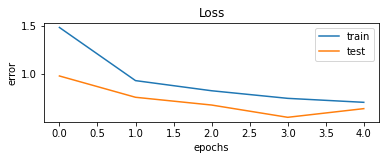

In [0]:
trainloss10, trainaccuracy10 = model10.evaluate(X_trains, y_trainc, verbose=0)
testloss10,testaccuracy10 = model10.evaluate(X_tests, y_testc, verbose=0)
print('Train: %.3f, Test: %.3f' % (trainaccuracy10, testaccuracy10))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(output10.history['loss'], label='train')
pyplot.plot(output10.history['val_loss'], label='test')
pyplot.xlabel('epochs')
pyplot.ylabel('error')

pyplot.legend()

[0.6923999786376953, 0.760016679763794, 0.7892666459083557, 0.8305833339691162, 0.8014833331108093]
[0.52888095, 0.7080476, 0.7392381, 0.7644524, 0.77933335]


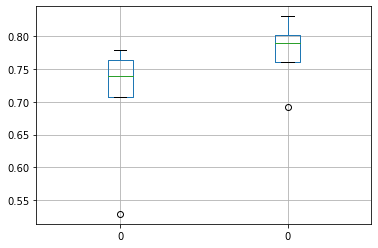

In [0]:
print(output10.history['val_accuracy'])

print(output10.history['accuracy'])

ta = pd.DataFrame(output10.history['accuracy'])
va = pd.DataFrame(output10.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

Model could not perform well with Earlystopping.NN model stopped before reaching global optimum

Using results from model8 for our evaluation and prediction which is quite decent model with 86% accuracy

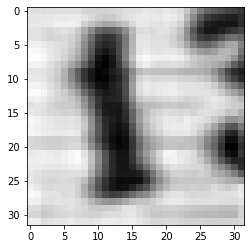

In [0]:
#predicting classes
plt.imshow(X_tests[6].reshape(32,32),cmap='gray')

In [0]:
model9.predict_classes(X_test)[6]

1

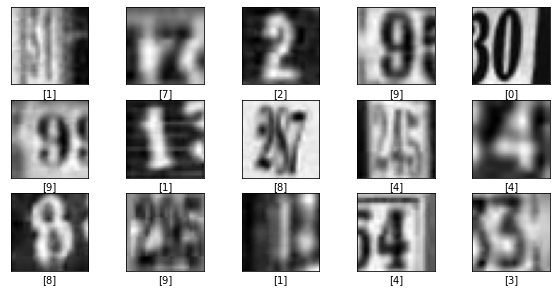

Label for each of the above image is [1 7 2 9 0 9 1 8 4 4 8 9 1 4 3]


In [0]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel([y_test[i]])
plt.show()
print('Label for each of the above image is',y_test[0:15])

In [0]:
#predicting the lables for test data 
n = 15
result = []
for i in range (n):
  results= model9.predict_classes(X_test)[i]
  result.append(results)
  i=i+1
  if(i == n):
    break
print(result)

[7, 7, 2, 9, 9, 9, 1, 1, 1, 4, 7, 3, 2, 4, 3]


From the above results we could see that 5 images are misclassified from actual values

In [0]:
y_pred = model8.predict_classes(X_tests)
print(y_pred)

rounded_labels=np.argmax(y_testc, axis=1)
rounded_labels[1]

[1 7 2 ... 7 9 2]


7

classification report for the model

In [0]:
from sklearn.metrics import classification_report
print(classification_report(rounded_labels, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1814
           1       0.83      0.89      0.86      1828
           2       0.89      0.87      0.88      1803
           3       0.85      0.82      0.83      1719
           4       0.92      0.89      0.90      1812
           5       0.83      0.84      0.84      1768
           6       0.83      0.86      0.84      1832
           7       0.89      0.91      0.90      1808
           8       0.86      0.81      0.83      1812
           9       0.87      0.84      0.85      1804

    accuracy                           0.86     18000
   macro avg       0.86      0.86      0.86     18000
weighted avg       0.86      0.86      0.86     18000



Confusion matrix for the model

In [0]:
conf_mat = confusion_matrix(rounded_labels, y_pred)
conf_mat

array([[1653,   30,   15,   12,   15,    5,   29,   12,   19,   24],
       [  18, 1632,   22,   23,   35,   11,   18,   38,   16,   15],
       [  19,   34, 1569,   30,   18,   14,   11,   57,   24,   27],
       [  14,   41,   44, 1404,   13,  102,   25,   23,   28,   25],
       [  16,   49,   15,   17, 1612,   16,   25,   17,   23,   22],
       [  16,   14,   17,   73,   10, 1493,   80,    9,   27,   29],
       [  43,   19,    8,   22,   22,   60, 1571,   13,   60,   14],
       [  11,   59,   23,   18,   15,    9,    9, 1639,   11,   14],
       [  30,   42,   23,   30,    5,   35,  100,    8, 1476,   63],
       [  68,   39,   26,   24,   14,   45,   23,   17,   40, 1508]])

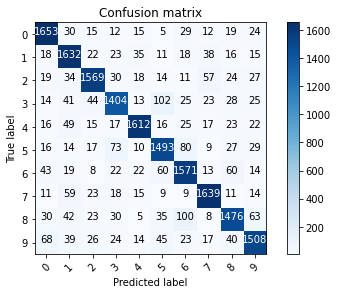

In [0]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



# plot the confusion matrix
plot_confusion_matrix(conf_mat, classes=range(10))


Conclusion: we built a model with SVHN data which is centered around middle digit. Model behaved poorly without hidden layers with accuracy of 10%. After including activation function for hidden layers as Relu and output layer as softmax, the model accuracy increased to 76%. After including Batchnormalisation layer model accuracy increased to 85. With fine tuning and optimizer as SGD the model accuracy increased to 86%.
Batch normalization is a method we can use to normalize the inputs of each layer, in order to fight the internal covariate shift problem.Also we observed that with Earlystopping model could not reach global optimum and stopped at local optimum. The dropout layer introduced distortion also made model biased. 